## The Fourier Series


In [ ]:
# Importing the packages as usual
%pip install ipympl
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from ipywidgets import * # interactive plots
import IPython
from IPython.display import Audio, Image
%matplotlib ipympl

### Trigonometric form of the Fourier Series

For a periodic signal, $f(t)$, the trigonometric form of the Fourier Series is given by

\begin{align}
  f(t)\approx \frac{1}{2} a_0 + \sum_{n=1}^{\infty}a_n \cos (n\omega_0 t)+\sum_{n=1}^{\infty}b_n \sin (n\omega_0 t)
\end{align}

where the coefficients can be found by evaluating the following integrals

$\begin{align}
	a_n &=  \frac{2}{T_0}\int_{t_0}^{t_0+T_0}f(t) \cos (n\omega_0 t)~\text{d}t\quad \text{for}~~n=0,1,2,...\\
	 b_n &=  \frac{2}{T_0}\int_{t_0}^{t_0+T_0} f(t) \sin (n\omega_0 t)~\text{d}t\quad \text{for}~~n=1,2,...\\
\end{align}$

### Square wave
When $f(t)$ is a square wave with a fundamental period, $T_{o}$, we can express it mathematically as

$\begin{align*}
	f(t) = \begin{cases} 1 &\text{for} \hspace{0.5cm}  0 < t \leq T_o/2 \\ 
                          -1 & \text{for} \hspace{0.5cm}  T_o/2 < t \leq T_o \\  \end{cases}
\end{align*}$

Computing the corresponding Fourier Series coefficients in Trigonometric form yielded 

$\begin{align}
	a_n &=  0 \\
     b_n &= \frac{2}{n \pi} \left[ 1 - (-1)^{n} \right] = \begin{cases}4/(n\pi)&\text{for}~n~\text{odd}\\0&\text{for}~n~\text{even}\end{cases}
\end{align}$


Hence the Fourier Series approximation of the square wave $f(t)$ is:
$\begin{align*}
  	f(t)\approx \sum_{n=1}^{\infty}b_n \sin (n\omega_0 t)
\end{align*}$

with $b_n$ defined as above. Note how the square wave consists of only odd-integered sinusoidal components. 

Let's do an interactive plot to see how this all works out.

Move the slider to see how the parameters change the cosine and listen to the result. The sound you hear is the sum of the sinusoids.


interactive(children=(IntSlider(value=1, description='N', max=30, min=1), IntSlider(value=300, description='f'…

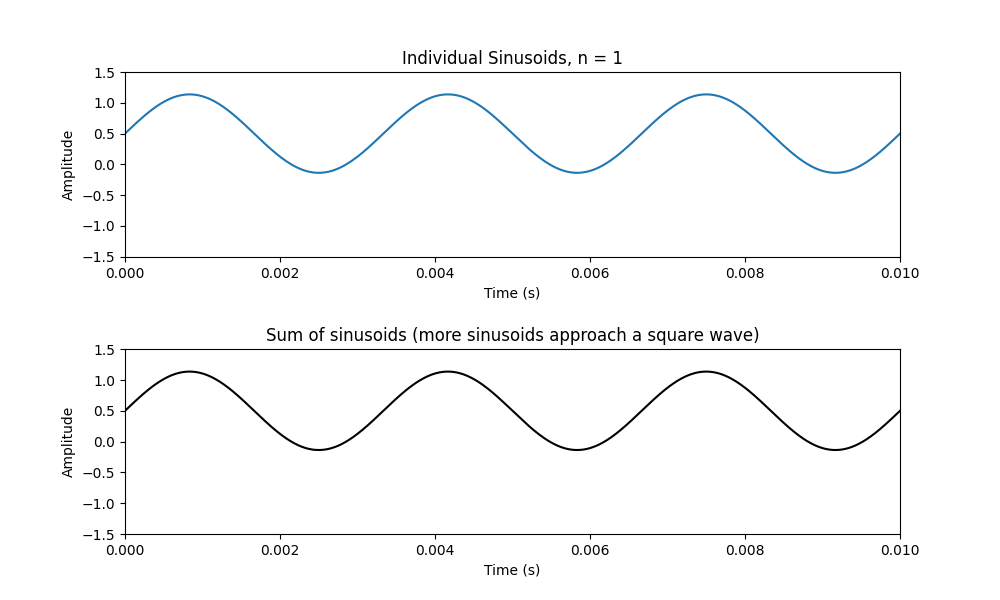

In [ ]:
# Setting up the plots
fig, axes = plt.subplots(2,1)
fig.subplots_adjust(hspace=0.5)  # horizontal spacing

dt = 0.00001 # time spacing
t = np.arange(0,2,dt) # range of times to plot on x-axis
axes[0].set_ylabel('Amplitude', color='k')
axes[0].set_xlabel('Time (s)', color='k')
axes[0].xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_xlim([0, 0.01])
axes[0].set_ylim([-1.5, 1.5])

sum_waves, = axes[1].plot([], [], 'k')
axes[1].set_ylabel('Amplitude', color='k')
axes[1].set_xlabel('Time (s)', color='k')
axes[1].xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[1].set_title('Sum of sinusoids (more sinusoids approach a square wave)')
axes[1].set_xlim([0, 0.01])
axes[1].set_ylim([-1.5, 1.5])


# Create the interactive plot
def update(N = 1, f=300):
    
    axes[0].clear()
    axes[0].set_xlim([0, 0.01])
    Y = np.zeros([len(t),N])
    for n in range(N):
        fo = (n+1)*f
        bn = (2/((n+1)*np.pi))*(1-(-1)**(n+1)) # for square wave
        Y[:,n] = bn*np.sin(2*np.pi*fo*t)
        axes[0].plot(t, Y[:,n])
        axes[0].set_title('Individual Sinusoids, n = '+str(n+1))
        
    Y_sum = np.sum(Y,axis=1)
    sum_waves.set_data(t, Y_sum)
    fig.canvas.draw_idle()
    IPython.display.display(Audio(Y_sum.T, rate=1/dt,normalize=True))
    
print('Move the slider to see how the parameters change the cosine and listen to the result. The sound you hear is the sum of the sinusoids.')
interact(update, N = (1,30,1), f=(100,1000,1));

### From the Fourier Series to the Fourier Transform

Considering the following signal defined over one period as follows:


$\begin{equation}
f(t) = \begin{cases}
 1 & |t| < T_{p} \\
 0 & T_{p} < t < T_{o}/2 \\
 \end{cases}
\end{equation}$

and periodically repeating with period T_{o}. This is a sort of pulse-train type signal. Let's plot it.


In [ ]:
# Let's plot the periodic signal - taken from here: https://stackoverflow.com/questions/29698213/rectangular-pulse-train-in-python


def rect(Tp):
    """ a function to return a centered rectangular pulse of width Tp """
    return lambda t: (-Tp <= t) & (t < Tp)

def pulse_train(t, at, shape):
    """create a train of pulses over t at times at and shape """
    return np.sum(shape(t - at[:,np.newaxis]), axis=0)


Tp = 0.5 # Pulse Width
To = 2

fig, axes = plt.subplots()
plt.subplots_adjust(hspace=0.7)

# Time domain plots

dt = 0.0001 # time spacing
t = np.arange(-5*To, 5*To, dt) # Range of times to plot 
line, = axes.plot([], [], 'k')
vline = axes.axvline(To, color='red', linestyle='--', linewidth=0.8,alpha=0.3)  # Draw horizontal line at y=0
vline2 = axes.axvline(-To, color='red', linestyle='--', linewidth=0.8,alpha=0.3)  # Draw horizontal line at y=0
label1 = axes.text(To-0.2, -1.2, '$T_{o}$', color='red', ha='left', va='bottom', backgroundcolor='white')
label2 = axes.text(-To-0.2, -1.2, '$-T_{o}$', color='red', ha='left', va='bottom', backgroundcolor='white')

vline3 = axes.axvline(To/2, color='blue', linestyle='--', linewidth=0.8, alpha=0.3)  # Draw horizontal line at y=0
vline4 = axes.axvline(-(To/2), color='blue', linestyle='--', linewidth=0.8, alpha=0.3)  # Draw horizontal line at y=0
label3 = axes.text((To/2)-0.2, -1.2, '$T_{o}/2$', color='blue', ha='left', va='bottom', backgroundcolor='white')
label4 = axes.text(-(To/2)-0.5, -1.2, '$-T_{o}/2$', color='blue', ha='left', va='bottom', backgroundcolor='white')

vline5 = axes.axvline(Tp, color='grey', linestyle='--', linewidth=0.8)  # Draw horizontal line at y=0
vline6 = axes.axvline(-Tp, color='grey', linestyle='--', linewidth=0.8)  # Draw horizontal line at y=0

label5 = axes.text(Tp-0.2, -0.7, '$T_{p}$', color='black',  ha='left', va='bottom', backgroundcolor='white')
label6 = axes.text(-Tp-0.2, -0.7, '$-T_{p}$', color='black', ha='left', va='bottom', backgroundcolor='white')


axes.set_ylabel('f(t)', color='k')
axes.set_xlabel('Time (s)', color='k')
axes.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes.set_xlim([-5, 5])
axes.set_ylim([-1.5, 2])
axes.set_title('Time Domain', color='k')




def update(To = 2):
    
    # Time domain plots
    
    y = pulse_train(t=t,at=np.arange(-5*To, 5*To, To),shape=rect(Tp))
    fig.canvas.draw_idle()
    line.set_data(t, y)
    
    vline.set_xdata([To, To])
    vline2.set_xdata([-To, -To])
    label1.set_x(To-0.15)
    label2.set_x(-To-0.15)
    vline3.set_xdata([To/2, To/2])
    vline4.set_xdata([-To/2, -To/2])
    label3.set_x((To/2)-0.2)
    label4.set_x(-(To/2)-0.5)
    
    
    

print('See how the signal changes as we increase the period:')
interact(update, To = (2,20,0.1)); 



In [ ]:
# Let's plot the periodic signal - taken from here: https://stackoverflow.com/questions/29698213/rectangular-pulse-train-in-python


def rect(Tp):
    """ a function to return a centered rectangular pulse of width Tp """
    return lambda t: (-Tp <= t) & (t < Tp)

def pulse_train(t, at, shape):
    """create a train of pulses over t at times at and shape """
    return np.sum(shape(t - at[:,np.newaxis]), axis=0)


Tp = 0.5 # Pulse Width

fig, axes = plt.subplots(2,1)
plt.subplots_adjust(hspace=0.7)

# Time domain plots

dt = 0.0001 # time spacing
t = np.arange(-5*To, 5*To, dt) # Range of times to plot 
line, = axes[0].plot([], [], 'k')
vline = axes[0].axvline(To, color='red', linestyle='--', linewidth=0.8,alpha=0.3)  # Draw horizontal line at y=0
vline2 = axes[0].axvline(-To, color='red', linestyle='--', linewidth=0.8,alpha=0.3)  # Draw horizontal line at y=0
label1 = axes[0].text(To-0.2, -1.2, '$T_{o}$', color='red', ha='left', va='bottom', backgroundcolor='white')
label2 = axes[0].text(-To-0.2, -1.2, '$-T_{o}$', color='red', ha='left', va='bottom', backgroundcolor='white')

vline3 = axes[0].axvline(To/2, color='blue', linestyle='--', linewidth=0.8, alpha=0.3)  # Draw horizontal line at y=0
vline4 = axes[0].axvline(-(To/2), color='blue', linestyle='--', linewidth=0.8, alpha=0.3)  # Draw horizontal line at y=0
label3 = axes[0].text((To/2)-0.2, -1.2, '$T_{o}/2$', color='blue', ha='left', va='bottom', backgroundcolor='white')
label4 = axes[0].text(-(To/2)-0.5, -1.2, '$-T_{o}/2$', color='blue', ha='left', va='bottom', backgroundcolor='white')

vline5 = axes[0].axvline(Tp, color='grey', linestyle='--', linewidth=0.8)  # Draw horizontal line at y=0
vline6 = axes[0].axvline(-Tp, color='grey', linestyle='--', linewidth=0.8)  # Draw horizontal line at y=0

label5 = axes[0].text(Tp-0.2, -0.7, '$T_{p}$', color='black',  ha='left', va='bottom', backgroundcolor='white')
label6 = axes[0].text(-Tp-0.2, -0.7, '$-T_{p}$', color='black', ha='left', va='bottom', backgroundcolor='white')


axes[0].set_ylabel('f(t)', color='k')
axes[0].set_xlabel('Time (s)', color='k')
axes[0].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes[0].set_xlim([-5, 5])
axes[0].set_ylim([-1.5, 2])
axes[0].set_title('Time Domain', color='k')


# Freq domain plots

f_int = np.arange(-100, 101, 1) # Range of integer frequencies to plot
T_ak = np.zeros(len(f_int))

markers, = axes[1].plot([],[], ls="none", marker="o")
baseline = axes[1].axhline(0, color="grey")

verts=np.c_[f_int, np.zeros_like(f_int), f_int, T_ak].reshape(len(T_ak),2,2)
col = matplotlib.collections.LineCollection(verts)
axes[1].add_collection(col)


line_Freq, = axes[1].plot([], [], 'b')
axes[1].set_xlim([-2*4*np.pi, 2*4*np.pi])
#axes[1].set_xlim([-4.1*np.pi, 4.1*np.pi])
axes[1].set_ylim([-0.5, 1.2])
axes[1].set_ylabel('$T_o  c_n$', color='k')
axes[1].set_xlabel('$\omega$ (rad/s)', color='k')
axes[1].set_title('Frequency Domain', color='k')

def update(To = 2):
    
    # Time domain plots
    
    y = pulse_train(t=t,at=np.arange(-5*To, 5*To, To),shape=rect(Tp))
    fig.canvas.draw_idle()
    line.set_data(t, y)
    
    vline.set_xdata([To, To])
    vline2.set_xdata([-To, -To])
    label1.set_x(To-0.15)
    label2.set_x(-To-0.15)
    vline3.set_xdata([To/2, To/2])
    vline4.set_xdata([-To/2, -To/2])
    label3.set_x((To/2)-0.2)
    label4.set_x(-(To/2)-0.5)
    
    
    # Frequency Domain plots
    wo = (2*np.pi)/To
    
    for n in range(len(f_int)):
        k = f_int[n]
        if k == 0:
            T_ak[n] = (2*Tp)
        else:
            T_ak[n] = (2*np.sin(k*wo*Tp))/(k*wo)
    
    markers.set_data(f_int*wo, T_ak)
    verts=np.c_[f_int*wo, np.zeros_like(f_int*wo), f_int*wo, T_ak].reshape(len(f_int*wo),2,2)
    col.set_segments(verts)
    
#     line_Freq.set_data(f_int*wo, T_ak)
    

print('See how the signal changes as we increase the period:')
interact(update, To = (2,20,0.1)); 



In [ ]:
# Let's plot the periodic signal - taken from here: https://stackoverflow.com/questions/29698213/rectangular-pulse-train-in-python


def rect(Tp):
    """ a function to return a centered rectangular pulse of width Tp """
    return lambda t: (-Tp <= t) & (t < Tp)

def pulse_train(t, at, shape):
    """create a train of pulses over t at times at and shape """
    return np.sum(shape(t - at[:,np.newaxis]), axis=0)


Tp = 0.5 # Pulse Width

fig, axes = plt.subplots(2,1)
plt.subplots_adjust(hspace=0.7)

# Time domain plots

dt = 0.0001 # time spacing
t = np.arange(-5*To, 5*To, dt) # Range of times to plot 
line, = axes[0].plot([], [], 'k')
# vline = axes[0].axvline(To, color='red', linestyle='--', linewidth=0.8,alpha=0.3)  # Draw horizontal line at y=0
# vline2 = axes[0].axvline(-To, color='red', linestyle='--', linewidth=0.8,alpha=0.3)  # Draw horizontal line at y=0
# label1 = axes[0].text(To-0.2, -1.2, '$T_{o}$', color='red', ha='left', va='bottom', backgroundcolor='white')
# label2 = axes[0].text(-To-0.2, -1.2, '$-T_{o}$', color='red', ha='left', va='bottom', backgroundcolor='white')

# vline3 = axes[0].axvline(To/2, color='blue', linestyle='--', linewidth=0.8, alpha=0.3)  # Draw horizontal line at y=0
# vline4 = axes[0].axvline(-(To/2), color='blue', linestyle='--', linewidth=0.8, alpha=0.3)  # Draw horizontal line at y=0
# label3 = axes[0].text((To/2)-0.2, -1.2, '$T_{o}/2$', color='blue', ha='left', va='bottom', backgroundcolor='white')
# label4 = axes[0].text(-(To/2)-0.5, -1.2, '$-T_{o}/2$', color='blue', ha='left', va='bottom', backgroundcolor='white')

# vline5 = axes[0].axvline(Tp, color='grey', linestyle='--', linewidth=0.8)  # Draw horizontal line at y=0
# vline6 = axes[0].axvline(-Tp, color='grey', linestyle='--', linewidth=0.8)  # Draw horizontal line at y=0

# label5 = axes[0].text(Tp-0.2, -0.7, '$T_{p}$', color='black',  ha='left', va='bottom', backgroundcolor='white')
# label6 = axes[0].text(-Tp-0.2, -0.7, '$-T_{p}$', color='black', ha='left', va='bottom', backgroundcolor='white')


axes[0].set_ylabel('f(t)', color='k')
axes[0].set_xlabel('Time (s)', color='k')
axes[0].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes[0].set_xlim([-5, 5])
axes[0].set_ylim([-1.5, 2])
axes[0].set_title('Time Domain', color='k')


# Freq domain plots

f_int = np.arange(-100, 101, 1) # Range of integer frequencies to plot
T_ak = np.zeros(len(f_int))

markers, = axes[1].plot([],[], ls="none", marker="o")
baseline = axes[1].axhline(0, color="grey")

# verts=np.c_[f_int, np.zeros_like(f_int), f_int, T_ak].reshape(len(T_ak),2,2)
# col = LineCollection(verts)
# axes[1].add_collection(col)


line_Freq, = axes[1].plot([], [], 'b')
axes[1].set_xlim([-2*4*np.pi, 2*4*np.pi])
#axes[1].set_xlim([-4.1*np.pi, 4.1*np.pi])
axes[1].set_ylim([-0.7, 4])
axes[1].set_ylabel('$T_o  c_n$', color='k')
axes[1].set_xlabel('$\omega$ (rad/s)', color='k')
axes[1].set_title('Frequency Domain', color='k')

def update(Tp = 0.5):
    
    # Time domain plots
    To = 20
    
    y = pulse_train(t=t,at=np.arange(-5*To, 5*To, To),shape=rect(Tp))
    fig.canvas.draw_idle()
    line.set_data(t, y)
    
#     vline.set_xdata([To, To])
#     vline2.set_xdata([-To, -To])
#     label1.set_x(To-0.15)
#     label2.set_x(-To-0.15)
#     vline3.set_xdata([To/2, To/2])
#     vline4.set_xdata([-To/2, -To/2])
#     label3.set_x((To/2)-0.2)
#     label4.set_x(-(To/2)-0.5)
    
    
    # Frequency Domain plots
    wo = (2*np.pi)/To
    
    for n in range(len(f_int)):
        k = f_int[n]
        if k == 0:
            T_ak[n] = (2*Tp)
        else:
            T_ak[n] = (2*np.sin(k*wo*Tp))/(k*wo)
    
#     markers.set_data(f_int*wo, T_ak)
#     verts=np.c_[f_int*wo, np.zeros_like(f_int*wo), f_int*wo, T_ak].reshape(len(f_int*wo),2,2)
#     col.set_segments(verts)
    
    line_Freq.set_data(f_int*wo, T_ak)
    

print('See how the spectrum changes as we compress/expand signal:')
interact(update, Tp = (0.5,2,0.1)); 

